### This is the notebook for creating tests and performing them.

Format of the paths : p = [(x,y),...]

1st : simple, and then more complex.
Easiest : same number of points in both paths. No crossing. No going back. On segent. Same position at the beginning.

In [2]:
# Imports

import matplotlib.pyplot as plt
import numpy as np


In [9]:
# Function which displays the paths

def displ(theo,expe):
    # theo is the theoretical path
    # expe is the one really performed
    plt.clf()
    plt.figure()
    plt.plot([theo[i][0] for i in range(len(theo))],[theo[i][1] for i in range(len(theo))],c='r',label = "theoretical")
    #plt.tit("theoretical")
    plt.plot([expe[i][0] for i in range(len(expe))],[expe[i][1] for i in range(len(expe))],c='g',label = "experimental")
    #plt.label("experimental")
    plt.title("Paths")
    plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

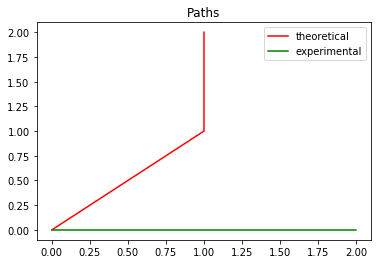

In [10]:
# Test 1 : very simple.

theo = [(0,0),(1,1),(1,2)]
expe = [(0,0),(1,0),(2,0)]

displ(theo,expe)

